In [1]:
%matplotlib inline

In [2]:
# %load ZVC.py
#!/usr/bin/env python
'''
# Zero velocity curve: the bounds on the motion of massless particle in
  restricted three-body problem. See Chapter 3 in the book "Solar system
  dynamics" by Murray & Dermott, 1999.
'''

import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('myout')

In [3]:
def value_for_Cj_contour(mp, ms, n, x, y):
    ''' Calculate the value of Cj of ZVC in the given range
     input:
        mp: mass of primary
        ms: mass of secondary
        n : rotation period
        x : range of x axis for the conrour plot
        y : range of y axis for the contour plot
     output:
        X : grid points of x
        Y : grid points of Y
        Cj: value of Jacobi integral
    '''
    # set grid points and calculate Cj for ZVC
    mu = ms / (mp+ms) # reduced mass
    (X, Y) = np.meshgrid(x, y)
    
    r1 = np.sqrt((X+mu)**2 + Y**2)
    r2 = np.sqrt((X-(1.-mu))**2 + Y**2)
    Cj = n**2 * (X**2 + Y**2) + 2*((1-mu)/r1 + mu/r2)
    return X, Y, Cj

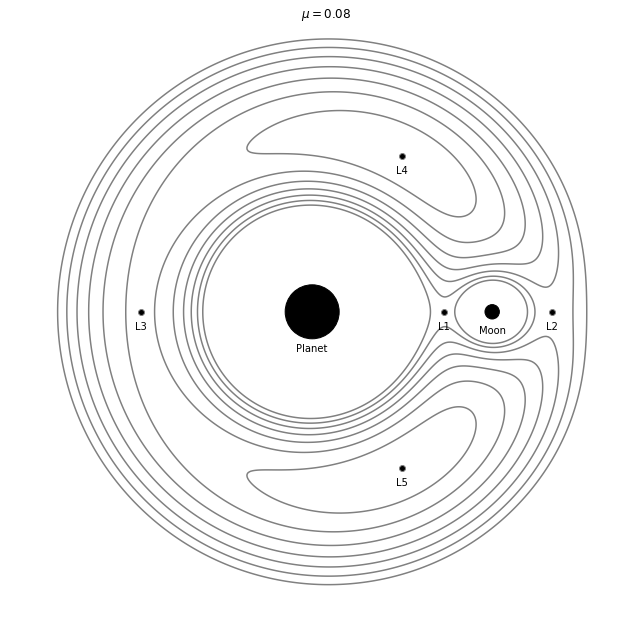

In [4]:
# for tadpole orbits: 
#  ms=0.01, levels = np.linspace(2.2, 3.8, 17)
#  ms=0.08 ,levels = np.linspace(2.9, 3.6, 8)

# parameters
ms = 0.08
mp = 1 - ms
x = np.linspace(-1.6,1.6,400)
y = np.linspace(-1.6,1.6,400)

# calculate values
X, Y, Cj = value_for_Cj_contour(mp=mp, ms=ms, n=1., x=x, y=y)

# plot figure
# f1, ax1 = plt.subplots(figsize=(8, 8))
fig = plt.figure(figsize=(8, 8), frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
# contour plot, if set mu=0.01, this plot looks like Fig. 3.9 of MurrayDermott1999
#levels = np.linspace(2.2, 3.8, 17) # a possible good range for mu=0.01
levels = np.linspace(2.9, 3.6, 8) # a possible good range for mu=0.08
cplot = ax.contour(X,Y,Cj, levels=levels, colors='gray')
# cb = fig.colorbar(cplot, orientation='vertical')
# cb = ax.contourf(X,Y,Cj, levels=levels, cmap='inferno_r')
ax.set_facecolor('black')


# add planet and satellite
x = ms/(ms+mp)
circle1 = plt.Circle((-x, 0), 0.15, color='k')
ax.add_artist(circle1)
ax.annotate(xy=(-x, -0.22), s="Planet", ha='center')
circle2 = plt.Circle((1-x, 0), 0.04, color='k')
ax.add_artist(circle2)
ax.annotate(xy=(1-x, -0.12), s="Moon", ha='center')

# add Lagrange points
Rh = (ms/(3*mp))**(1./3)
r2_1 = Rh - 1./3*Rh**2 - 1./9*Rh**3 - 23./81*Rh**4  # for L1, eq. 3.83
r2_2 = Rh + 1./3*Rh**2 - 1./9*Rh**3 - 31./81*Rh**4  # for L2, eq. 3.88
beta = -7./12*(ms/mp)+7./12*(ms/mp)**2 - 13223./20736*(ms/mp)**3  # for L3, eq 3.93
L4_y = np.sqrt(3)/2.
ax.scatter((1-x-r2_1, 1-x+r2_2, -1-x-beta, 0.5-ms, 0.5-ms, ),
           (0, 0, 0, L4_y, -L4_y), color='k', edgecolor='gray')
ax.annotate(xy=(1-x-r2_1, -0.1), s="L1", ha='center')
ax.annotate(xy=(1-x+r2_2, -0.1), s="L2", ha='center')
ax.annotate(xy=(-1-x-beta, -0.1), s="L3", ha='center')
ax.annotate(xy=(0.5-ms, L4_y-0.1), s="L4", ha='center')
ax.annotate(xy=(0.5-ms, -L4_y-0.1), s="L5", ha='center')

ax.set_title(r'$\mu={}$'.format(ms/(mp+ms)))

#for loc in ('left', 'right', 'top', 'bottom'):
#    ax1.spines[loc].set_visible(False)
ax.axis('off')

plt.show()
#fig.savefig('ZVC.pdf')